**noise reduction with PCA**

import libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA 
import random
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

load mnist dataset

In [63]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

print("x_train shape : ", x_train.shape,"\n",
    "y_train shape : ", y_train.shape, "\n",
    "x_test shape : ", x_test.shape,"\n",
    "y_test shape : ", y_test.shape)

x_train shape :  (60000, 28, 28) 
 y_train shape :  (60000,) 
 x_test shape :  (10000, 28, 28) 
 y_test shape :  (10000,)


now see a sample of dataset

image shape :  (28, 28)


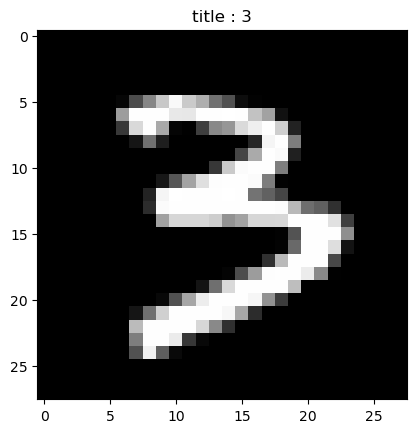

In [64]:
sample_index = random.randint(0,5999)
sample_img = x_train[sample_index]
print("image shape : ",sample_img.shape)
sample_label = y_train[sample_index]

# see the pic
plt.imshow(sample_img, cmap='gray')
plt.show()

adding gaussian noise to the dataset

In [65]:
gaussian_noise = np.zeros(x_train[0].shape, dtype=np.uint8)
cv2.randn(gaussian_noise, 128, 20)
gaussian_noise = (gaussian_noise * 0.5).astype(np.uint8)

gn_images = []
for i in range(60000):
    gn_images.append(cv2.add(x_train[i], gaussian_noise))


now see the noisy picture

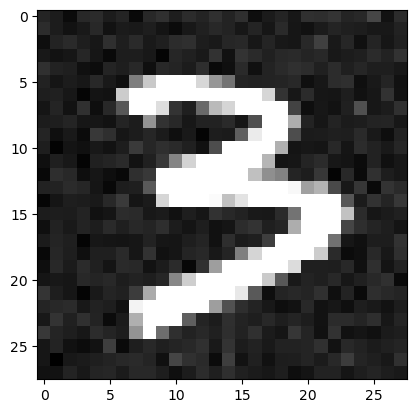

In [66]:
plt.imshow(gn_images[sample_index], cmap="gray")
plt.show()


convert images to matrices

In [67]:
npdata = np.asarray(gn_images)
print(f"shape of the data : {npdata.shape}")
print(f"sample image converted to this matrix: \n{npdata[sample_index].shape}")

shape of the data : (60000, 28, 28)
sample image converted to this matrix: 
(28, 28)


now we have to reshape our data so we can apply pca

In [68]:
reshaped_npdata = npdata.reshape(60000, 28*28)
print(f"correct shape : {reshaped_npdata.shape} and the sample : {reshaped_npdata[sample_index].shape}")

correct shape : (60000, 784) and the sample : (784,)


In [69]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reshaped_npdata)
print(f"correct shape : {standardized_data.shape} and the sample : {standardized_data[sample_index].shape}")

correct shape : (60000, 784) and the sample : 
(784,)


In [85]:
pca = PCA()
pca = PCA(n_components=0.95) # principal component to 95% of variance
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(60000, 355)

In [86]:
reconstructed_data = pca.inverse_transform(pca_data)
reconstructed_data = scaler.inverse_transform(reconstructed_data)
reconstructed_images = reconstructed_data.reshape(60000, 28, 28)
reconstructed_images.shape

(60000, 28, 28)

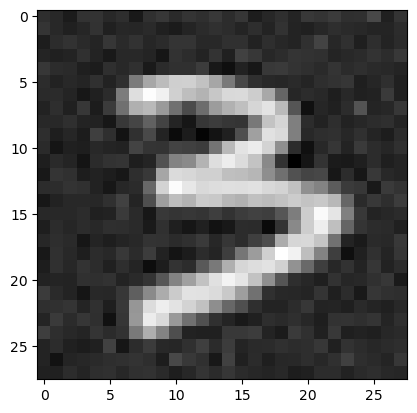

In [87]:
plt.imshow(reconstructed_images[sample_index], cmap="gray")
plt.show()